In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. 加载行星数据集
# planets = sns.load_dataset('planets') 网络加载
# 本地加载
file_path = 'planets.csv' 
planets = pd.read_csv(file_path)

# 2. 显示数据集的前几行 和 数据概览
print("行星数据集的前几行:\n", planets.head())
print("\n数据集信息:")
print(planets.info())

行星数据集的前几行:
             method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

数据集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None


In [10]:
# 2. 数据清洗：删除缺失值
planets_cleaned = planets.dropna()

# 3. 选择特征和目标变量
# 这里我们选择 'year' 作为特征，'mass' 作为目标变量
X = planets_cleaned[['year']]
y = planets_cleaned['mass']

# 4. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 创建线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 6. 预测
y_pred = model.predict(X_test)

# 7. 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 11.07


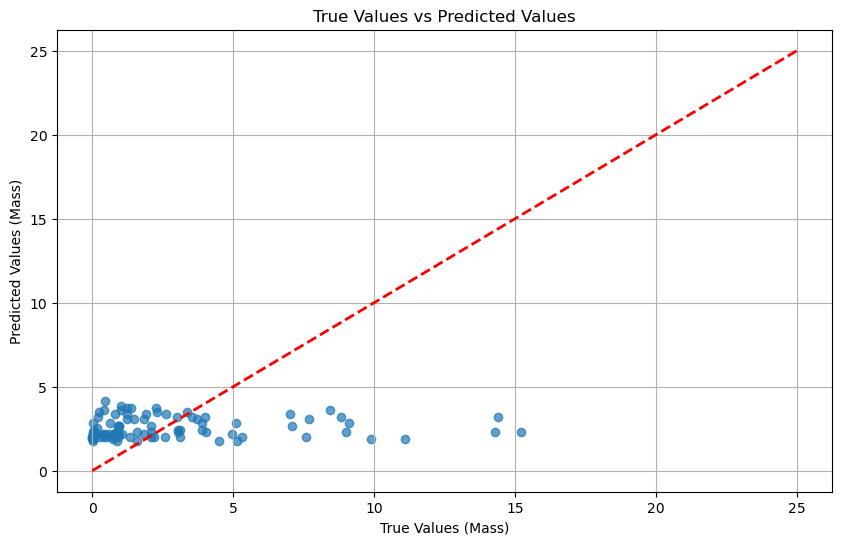

In [12]:
# 8. 可视化真实值与预测值的关系
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # 45度线
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values (Mass)')
plt.ylabel('Predicted Values (Mass)')
plt.grid()
plt.show()

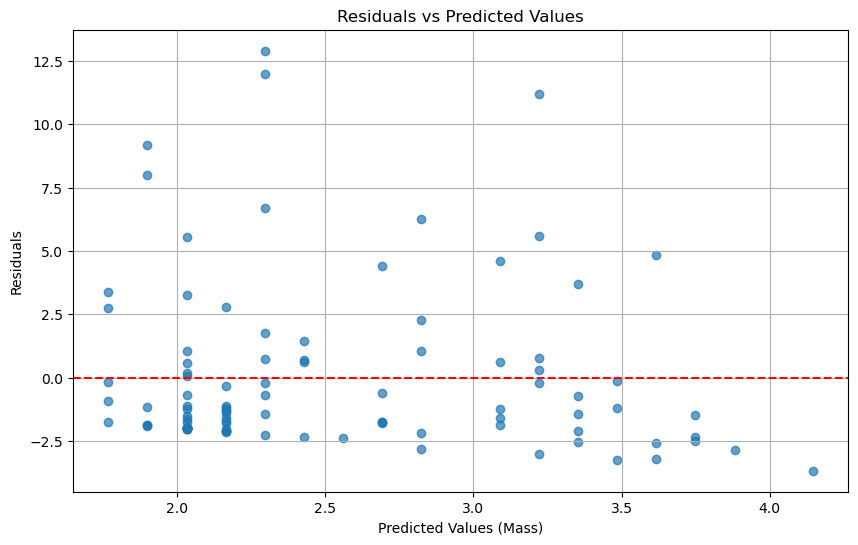

In [14]:
# 9. 绘制残差图
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values (Mass)')
plt.ylabel('Residuals')
plt.grid()
plt.show()